<a href="https://colab.research.google.com/github/meshalalsultan/Tensoflow/blob/main/Insurance_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

print(tf.__version__)

2.6.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/insurance.csv"
insurance = pd.read_csv(file_name)

# Preview our data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
print('Rows: ' , insurance.shape[0])
print('Columns: ' , insurance.shape[1])
print('\nFeature: \n' , insurance.columns.to_list())
print('\nMissing Value: \n', insurance.isnull().sum().values.sum())
print('\nUnique Values: \n',insurance.nunique())

Rows:  1338
Columns:  7

Feature: 
 ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

Missing Value: 
 0

Unique Values: 
 age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


In [7]:
insurance.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


No handles with labels found to put in legend.


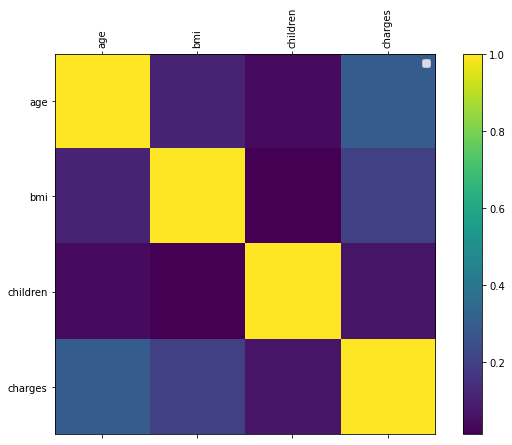

In [8]:
def plot_corr(df,size=(10,7)):
  corr = df.corr()
  fig,ax = plt.subplots(figsize=(size))
  ax.legend()
  cax=ax.matshow(corr)
  fig.colorbar(cax)
  plt.xticks(range(len(corr.columns)),corr.columns, rotation='vertical')
  plt.yticks(range(len(corr.columns)),corr.columns)

plot_corr(insurance);

#Plot the Featcher's

Check the destrepution for the feature , To see how the balance in ceatch coloumns

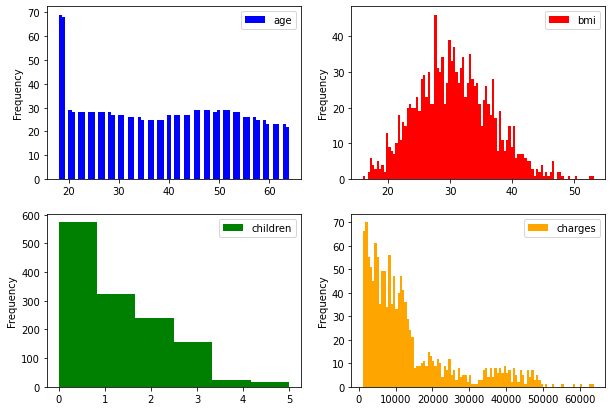

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2 , figsize=(10,7))
insurance.plot(kind='hist', y='age', bins=70, color='b',ax=axes[0][0])
insurance.plot(kind='hist',y='bmi', bins=100, color='r', ax=axes [0][1])
insurance.plot(kind='hist' ,y='children', bins=6, color='g', ax=axes[1][0])
insurance.plot(kind='hist',y='charges', bins=100, color='orange',ax=axes[1][1])
plt.show()

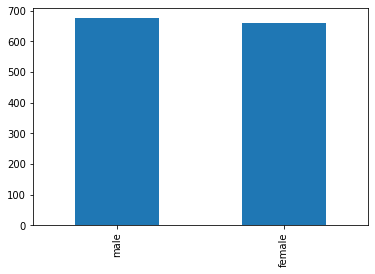

In [13]:
#Check the sex balance (value)
insurance['sex'].value_counts().plot(kind='bar');

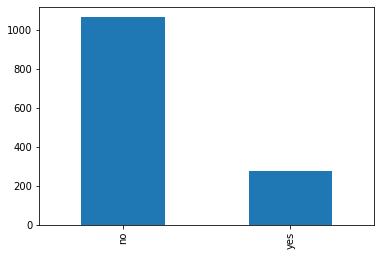

In [15]:
#Smoker value
insurance['smoker'].value_counts().plot(kind='bar')

#The Corrolation Mitrix

Check the corrlaction between featcher and target .

This important becouse i want check if any of the featcher have direct impact on target .!

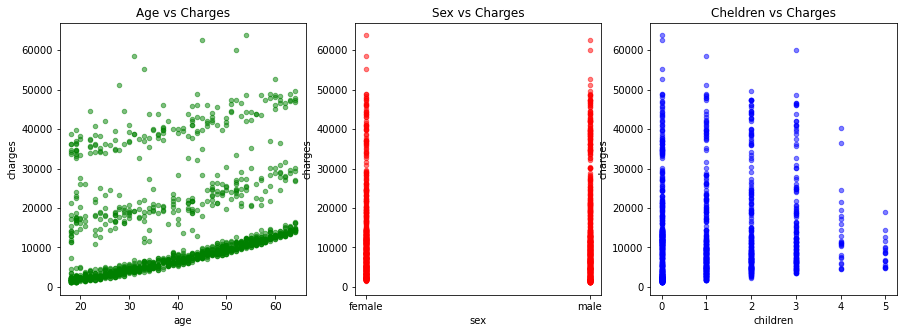

In [20]:
fig, axes=plt.subplots(nrows=1 ,ncols=3, figsize=(15,5))
insurance.plot(kind='scatter' , x='age',y='charges', alpha=0.5, color='g', ax=axes[0], title='Age vs Charges')
insurance.plot(kind='scatter',x='sex',y='charges',alpha=0.5,color='r',ax=axes[1], title='Sex vs Charges')
insurance.plot(kind='scatter', x='children' , y='charges',alpha=0.5,color='blue',ax=axes[2], title='Cheldren vs Charges')
plt.show();

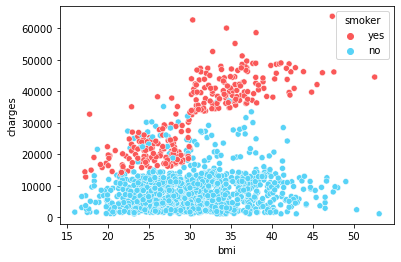

In [21]:
import seaborn as sns
pal= ['#FA5858','#58D3F7']
sns.scatterplot(x='bmi', y='charges' , data=insurance, palette=pal, hue='smoker');

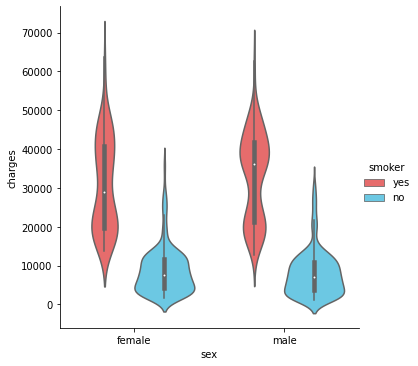

In [24]:
pal= ['#FA5858' , '#58D3F7']
sns.catplot(x='sex' , y='charges', hue='smoker',kind='violin', data=insurance, palette=pal);

Text(0.5, 1.0, 'Smocker')

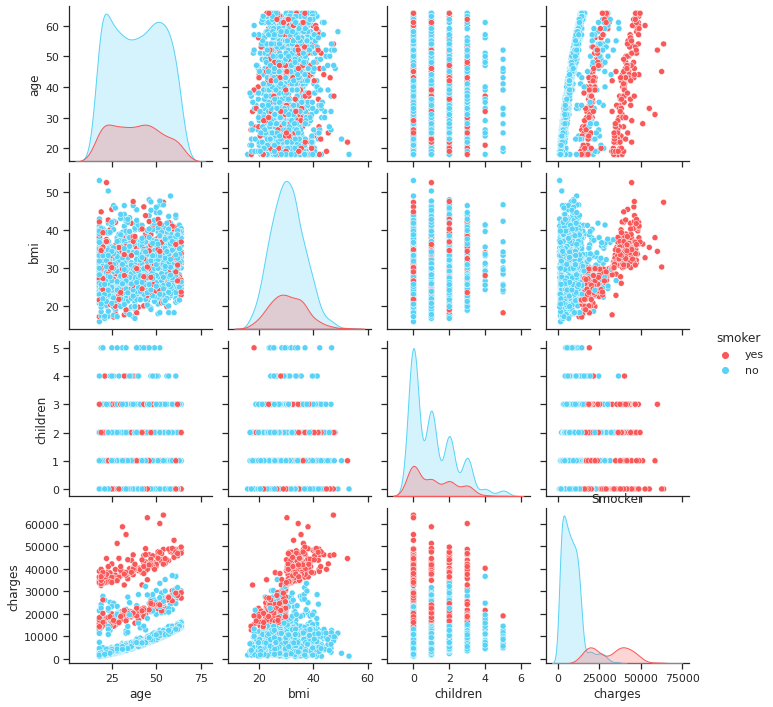

In [25]:
sns.set(style='ticks')
pal=['#FA5858', '#58D3F7']
sns.pairplot(insurance, hue='smoker' , palette=pal)
plt.title('Smocker')

#Modeling

In [30]:
insurance.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [27]:
insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

##Remove the region column

In [29]:
insurance.drop('region' ,axis=1,inplace=True)
insurance.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [31]:
data = insurance.copy()

##Changeing binary catagory to i and 0

In [32]:
insurance['sex'] = insurance['sex'].map(lambda s:1 if s== 'female' else 0)
insurance['smoker'] = insurance['smoker'].map(lambda s:1 if s=='yes' else 0)
insurance.head()

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520


In [33]:
x= insurance.drop('charges',axis=1)
y= insurance['charges']
x,y

(      age  sex     bmi  children  smoker
 0      19    1  27.900         0       1
 1      18    0  33.770         1       0
 2      28    0  33.000         3       0
 3      33    0  22.705         0       0
 4      32    0  28.880         0       0
 ...   ...  ...     ...       ...     ...
 1333   50    0  30.970         3       0
 1334   18    1  31.920         0       0
 1335   18    1  36.850         0       0
 1336   21    1  25.800         0       0
 1337   61    1  29.070         0       1
 
 [1338 rows x 5 columns], 0       16884.92400
 1        1725.55230
 2        4449.46200
 3       21984.47061
 4        3866.85520
            ...     
 1333    10600.54830
 1334     2205.98080
 1335     1629.83350
 1336     2007.94500
 1337    29141.36030
 Name: charges, Length: 1338, dtype: float64)

In [34]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train ,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

x_train.shape , x_test.shape , y_train.shape , y_test.shape

((1070, 5), (268, 5), (1070,), (268,))

Createing Modeling and after that i will  tune the parameter

In [36]:
#Set Random Seed
tf.random.set_seed(42)

#Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(10)
])

#Compile the model
model_1.compile(loss= tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['mae'])
#Fit the model
model_1.fit(x_train,y_train,epochs=100)


Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 13345.6553 - mae: 13345.6553
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13343.1885 - mae: 13343.1885
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 13340.7207 - mae: 13340.7207
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13338.2500 - mae: 13338.2500
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 13335.7842 - mae: 13335.7842
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 13333.3115 - mae: 13333.3115
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 13330.8457 - mae: 13330.8457
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 13328.3809 - mae: 13328.3809
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 13325.9111 - mae: 13325.9111
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 13323.44

In [38]:
model_1.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 12723.1543 - mae: 12723.1543


[12723.154296875, 12723.154296875]

The model error is around 12723 , thats not good , i will hypertune the model by 3 step :

1. Add more layers
2. Add more nuron
3. Add more epochs

In [40]:
#Set the random seed
tf.random.set_seed(42)

#Create the model_2
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1) #The output layers
])

#Compile the model_2
model_2.compile(loss= tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['mae'])

#Fit the model_2
model_2.fit(x_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13276.2061 - mae: 13276.2061
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13114.7080 - mae: 13114.7080
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12778.3369 - mae: 12778.3369
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 12124.5322 - mae: 12124.5322
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 11028.9062 - mae: 11028.9062
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9590.0195 - mae: 9590.0195
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 8225.2070 - mae: 8225.2070
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7513.2559 - mae: 7513.2559
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7387.2197 - mae: 7387.2197
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7369.1064 - mae:

In [41]:
model_2.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 6059.1553 - mae: 6059.1553


[6059.1552734375, 6059.1552734375]

So Its Training good But , Not So Goood i think i can add more epochs 

In [42]:
#Set random seed
tf.random.set_seed(42)

#Create model_3
model_3= tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

#Compile the model
model_3.compile(loss= tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae'])

#Fit the model_3
history = model_3.fit(x_train,y_train,epochs= 200)

Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 13276.2061 - mae: 13276.2061
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 13114.7080 - mae: 13114.7080
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 12778.3369 - mae: 12778.3369
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 12124.5322 - mae: 12124.5322
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 11028.9062 - mae: 11028.9062
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9590.0195 - mae: 9590.0195
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 8225.2070 - mae: 8225.2070
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7513.2559 - mae: 7513.2559
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 7387.2197 - mae: 7387.2197
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7369.1064 - mae:

When i add more epoch that mean i give the model more chance to learn ,
So the model learn good but slowly ,i will give the model more learning rate .

In [44]:
#Set random seed
tf.random.set_seed(42)

#Create model_4
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

#Compile the model_4
model_4.compile(loss= tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr=0.01),
                metrics = ['mae'])

#Fit Model_4
history_4 = model_4.fit(x_train,y_train,epochs=300)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/300
34/34 [==============================] - 0s 2ms/step - loss: 11500.8203 - mae: 11500.8203
Epoch 2/300
34/34 [==============================] - 0s 2ms/step - loss: 7469.8843 - mae: 7469.8843
Epoch 3/300
34/34 [==============================] - 0s 2ms/step - loss: 7269.7837 - mae: 7269.7837
Epoch 4/300
34/34 [==============================] - 0s 1ms/step - loss: 7067.3584 - mae: 7067.3584
Epoch 5/300
34/34 [==============================] - 0s 2ms/step - loss: 6891.4590 - mae: 6891.4590
Epoch 6/300
34/34 [==============================] - 0s 1ms/step - loss: 6694.0669 - mae: 6694.0669
Epoch 7/300
34/34 [==============================] - 0s 2ms/step - loss: 6612.4468 - mae: 6612.4468
Epoch 8/300
34/34 [==============================] - 0s 2ms/step - loss: 6519.7241 - mae: 6519.7241
Epoch 9/300
34/34 [==============================] - 0s 2ms/step - loss: 6479.0352 - mae: 6479.0352
Epoch 10/300
34/34 [==============================] - 0s 2ms/step - loss: 6394.3691 - mae: 6394.36

In [46]:
model_4.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3243.5540 - mae: 3243.5540


[3243.553955078125, 3243.553955078125]

In [48]:
model_4.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 100)               600       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 11        
Total params: 1,621
Trainable params: 1,621
Non-trainable params: 0
_________________________________________________________________


The Model Stop Learning after around 200 epoch , i will add more unite to learn , and keep all same

In [49]:
#Set seed
tf.random.set_seed(42)

#Create Model_5
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1)
])

#Compile model_5
model_5.compile(loss= tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr=0.02),
                metrics = ['mae'])

#Fit model_5
history_5 = model_5.fit(x_train,y_train,epochs=200)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 8707.0068 - mae: 8707.0068
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 7039.8594 - mae: 7039.8594
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 6560.1792 - mae: 6560.1792
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 6376.3247 - mae: 6376.3247
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 5863.9761 - mae: 5863.9761
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 5427.3291 - mae: 5427.3291
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 4397.9839 - mae: 4397.9839
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 4128.0801 - mae: 4128.0801
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 4005.0239 - mae: 4005.0239
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 3866.3892 - mae: 3866.3892

I will change the Adam optimizer to SGD

In [52]:
#Set random seed
tf.random.set_seed(42)

#Create model_6
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(50),
  tf.keras.layers.Dense(1)
])

#Compile the model
model_6.compile(loss= tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae'])

#Fit the model
history_6 = model_6.fit(x_train,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 13244.3125 - mae: 13244.3125
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 12815.9785 - mae: 12815.9785
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 11638.4551 - mae: 11638.4551
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 9421.6475 - mae: 9421.6475
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 7624.1191 - mae: 7624.1191
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 7372.2754 - mae: 7372.2754
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 7344.0054 - mae: 7344.0054
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 7315.7070 - mae: 7315.7070
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7286.7598 - mae: 7286.7598
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7259.4868 - mae: 725

In [55]:
model_6.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3219.5894 - mae: 3219.5894


[3219.58935546875, 3219.58935546875]

##Plot the Learning Curve for model_6

Text(0.5, 0, 'Epochs')

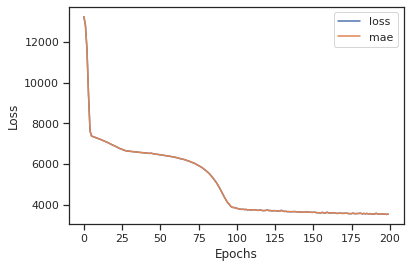

In [56]:
pd.DataFrame(history_6.history).plot()
plt.ylabel('Loss')
plt.xlabel('Epochs')

Sice With this all expirmint the model still can't train very well After 100 epochs , i decide to do 1 more think's :

-  Add more unit to alrady choosen layer

#Model_7

In [57]:
# Set the random seed
tf.random.set_seed(42)

#Create model_7
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(50),
  tf.keras.layers.Dense(1)
])

#compile the model
model_7.compile(loss= tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr=0.02),
                metrics = ['mae'])

#Fit the model
history_7 = model_7.fit(x_train,y_train,epochs=150)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/150
34/34 [==============================] - 1s 2ms/step - loss: 8123.0908 - mae: 8123.0908
Epoch 2/150
34/34 [==============================] - 0s 2ms/step - loss: 6746.6401 - mae: 6746.6401
Epoch 3/150
34/34 [==============================] - 0s 2ms/step - loss: 6290.9575 - mae: 6290.9575
Epoch 4/150
34/34 [==============================] - 0s 2ms/step - loss: 5857.1870 - mae: 5857.1870
Epoch 5/150
34/34 [==============================] - 0s 2ms/step - loss: 4263.4624 - mae: 4263.4624
Epoch 6/150
34/34 [==============================] - 0s 2ms/step - loss: 4679.0801 - mae: 4679.0801
Epoch 7/150
34/34 [==============================] - 0s 2ms/step - loss: 3959.7747 - mae: 3959.7747
Epoch 8/150
34/34 [==============================] - 0s 2ms/step - loss: 4152.3691 - mae: 4152.3691
Epoch 9/150
34/34 [==============================] - 0s 2ms/step - loss: 4394.5444 - mae: 4394.5444
Epoch 10/150
34/34 [==============================] - 0s 2ms/step - loss: 4160.1274 - mae: 4160.1274

In [58]:
model_7.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3239.2488 - mae: 3239.2488


[3239.248779296875, 3239.248779296875]

Text(0.5, 0, 'Epochs')

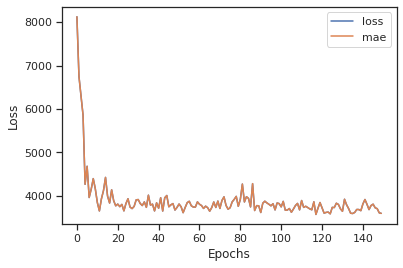

In [59]:
pd.DataFrame(history_7.history).plot()
plt.ylabel('Loss')
plt.xlabel('Epochs')

#Normalize and OneHotEncoding the featchrs

Since antile now no progress , i decide to normalize and one hot encoding the featchers 

In [61]:
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/insurance.csv"
insurance = pd.read_csv(file_name)

# Preview our data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [62]:
data = insurance.copy()

In [63]:
data.drop('region',axis=1,inplace=True)
data.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [67]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

#Create columns transformer ( this will help me normalize/process the data)
ct = make_column_transformer(
    (MinMaxScaler(),['age','bmi','children']),#make them 0 and 1
    (OneHotEncoder(handle_unknown='ignore'),['sex','smoker'])
)

#Create X and Y
x = data.drop('charges',axis=1)
y = data['charges']

#Split the data to train and test
x_train , x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#Fit the columns tranfomer on the training sets ( use the random state to insure the same split as before)
ct.fit(x_train)

#Transform training and test data with normalazation (MinMaxScaler , OneHotEncoder)
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

Lets see the data now

In [68]:
x_train.loc[0]

age             19
sex         female
bmi           27.9
children         0
smoker         yes
Name: 0, dtype: object

In [69]:
x_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        ])

In [70]:
#Check the shape
x_train_normal.shape, x_train.shape

((1070, 7), (1070, 5))

The data is normalize now , its time to make 

#Model 8 - With Normalize data

In [72]:
#Set the random seed
tf.random.set_seed(42)

#Create model_8
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(50),
  tf.keras.layers.Dense(1)
])

#Compile the model_8
model_8.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae'])

#Fit the Model_8
history_8= model_8.fit(x_train_normal,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 13341.7500 - mae: 13341.7500
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13321.1016 - mae: 13321.1016
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 13258.1230 - mae: 13258.1230
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 13114.9326 - mae: 13114.9326
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 12849.6201 - mae: 12849.6201
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 12418.6963 - mae: 12418.6963
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 11788.2900 - mae: 11788.2900
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 10989.4346 - mae: 10989.4346
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 10155.8418 - mae: 10155.8418
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 9351.217

In [73]:
model_8.evaluate(x_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3197.8184 - mae: 3197.8184


[3197.818359375, 3197.818359375]

Text(0.5, 0, 'EPOCHS')

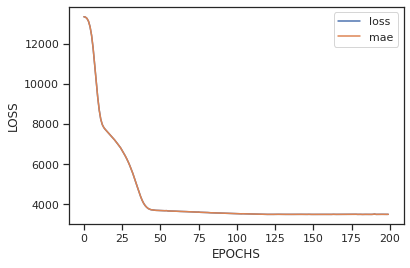

In [74]:
pd.DataFrame(history_8.history).plot()
plt.ylabel('LOSS')
plt.xlabel('EPOCHS')

#Model_9

In [77]:
#Set the random seeds
tf.random.set_seed(42)

#Create Model_9
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(300),
  tf.keras.layers.Dense(200),
  tf.keras.layers.Dense(50),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

#Compile Model_9
model_9.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae'])

#Fit Model_9
history_9 = model_9.fit(x_train_normal,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 13270.2812 - mae: 13270.2812
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 11227.5332 - mae: 11227.5332
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 7841.9028 - mae: 7841.9028
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 7227.1562 - mae: 7227.1562
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 6341.8052 - mae: 6341.8052
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 4699.0825 - mae: 4699.0825
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 3737.6011 - mae: 3737.6011
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 3695.9099 - mae: 3695.9099
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 3664.5391 - mae: 3664.5391
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 3663.1814 - mae: 3663.

Evalute Model_9

In [78]:
model_9.evaluate(x_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3209.6428 - mae: 3209.6428


[3209.642822265625, 3209.642822265625]

Learning rate curve

Text(0.5, 0, 'Epochs')

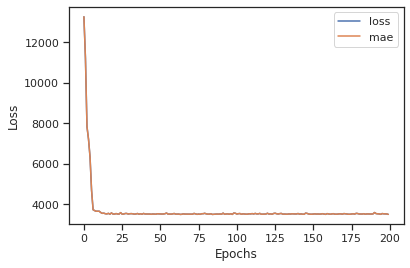

In [79]:
pd.DataFrame(history_9.history).plot()
plt.ylabel('Loss')
plt.xlabel('Epochs')

#Model_10

For this last model i spicaly create this model to add more learning rate to `Adam()` optimizer , i will try to give more than 10 learning rate 

So Lets see whats hapen !

In [80]:
model_9.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 300)               2400      
_________________________________________________________________
dense_47 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_48 (Dense)             (None, 50)                10050     
_________________________________________________________________
dense_49 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 11        
Total params: 73,171
Trainable params: 73,171
Non-trainable params: 0
_________________________________________________________________


In [88]:
#Set the random seed
tf.random.set_seed(42)

#Create Model_10
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(300),
  tf.keras.layers.Dense(200),
  tf.keras.layers.Dense(50),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

#Compile Model_10
model_10.compile(loss= tf.keras.losses.mae,
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['mae'])

#Fit Model_10
history_10 = model_10.fit(x_train_normal , y_train, epochs= 300)#give the model more space to training becouse i change the optimizer

Epoch 1/300
34/34 [==============================] - 1s 2ms/step - loss: 13270.2812 - mae: 13270.2812
Epoch 2/300
34/34 [==============================] - 0s 2ms/step - loss: 11227.5332 - mae: 11227.5332
Epoch 3/300
34/34 [==============================] - 0s 2ms/step - loss: 7841.9028 - mae: 7841.9028
Epoch 4/300
34/34 [==============================] - 0s 2ms/step - loss: 7227.1562 - mae: 7227.1562
Epoch 5/300
34/34 [==============================] - 0s 2ms/step - loss: 6341.8052 - mae: 6341.8052
Epoch 6/300
34/34 [==============================] - 0s 2ms/step - loss: 4699.0825 - mae: 4699.0825
Epoch 7/300
34/34 [==============================] - 0s 2ms/step - loss: 3737.6011 - mae: 3737.6011
Epoch 8/300
34/34 [==============================] - 0s 2ms/step - loss: 3695.9099 - mae: 3695.9099
Epoch 9/300
34/34 [==============================] - 0s 2ms/step - loss: 3664.5391 - mae: 3664.5391
Epoch 10/300
34/34 [==============================] - 0s 2ms/step - loss: 3663.1814 - mae: 3663.

In [89]:
model_10.evaluate(x_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3186.6472 - mae: 3186.6472


[3186.647216796875, 3186.647216796875]

Text(0.5, 0, 'Epochs')

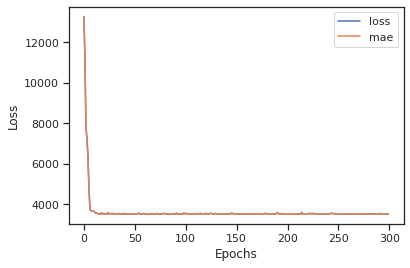

In [90]:
pd.DataFrame(history_10.history).plot()
plt.ylabel('Loss')
plt.xlabel('Epochs')

#Waite ..!!! There's More

#Model_11

So Every expirmint i try 100 or + in inpute layer , but i not try to but number of featchers as input layer , so the featchers i have is : 

1. age
2. sex
3. bmi
4. children
5. smoker

Let Me Try this time with input layer have **5 nuron** , it's worth to test .

In [136]:
#Set random seed
tf.random.set_seed(42)

#Create model_11
model_11 = tf.keras.Sequential([
  tf.keras.layers.Dense(5),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1)
])

#Compile Model_11
model_11.compile(loss= tf.keras.losses.mae,
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['mae'])

#Fit Model_11
history_11 = model_11.fit(x_train_normal,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13345.2383 - mae: 13345.2383
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13342.1377 - mae: 13342.1377
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13335.2002 - mae: 13335.2002
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13320.8564 - mae: 13320.8564
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 13294.8545 - mae: 13294.8545
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 13252.5273 - mae: 13252.5273
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 13189.4385 - mae: 13189.4385
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 13101.2500 - mae: 13101.2500
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12983.6367 - mae: 12983.6367
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 12832.79

In [137]:
model_11.evaluate(x_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3582.9033 - mae: 3582.9033


[3582.9033203125, 3582.9033203125]

Text(0.5, 0, 'Epochs')

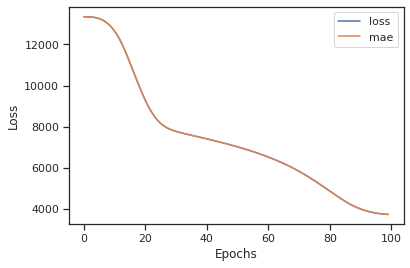

In [138]:
pd.DataFrame(history_11.history).plot()
plt.ylabel('Loss')
plt.xlabel('Epochs')

#Create **MAE** and **MSE** function

Create function to evalute all models

In [94]:
def mae(y_test,y_pred):
  return tf.metrics.mean_absolute_error(y_test,y_pred)

In [95]:
def mse(y_test,y_pred):
  return tf.metrics.mean_squared_error(y_test,y_pred)

The Model i make history for these the model will include from Model_8 to Model_11

In [100]:
y_pred_8 = model_8.predict(x_test_normal)

In [101]:
y_pred_9 = model_9.predict(x_test_normal)

In [132]:
y_pred_9.shape

(268, 1)

In [133]:
y_pred_10 = model_10.predict(x_test_normal)
y_pred_10.shape

(268, 1)

In [141]:
y_pred_11 = model_11.predict(x_test_normal)
y_pred_11.shape

(268, 1)

Claculate the MAE and MSE to the Predection

Try To Create Functioin for to calculate the mae and mse

In [115]:
def calculate(y_pred):
  the_mae = tf.metrics.mean_absolute_error(y_test,y_pred)
  the_mae = mae(y_test,y_pred.squeeze()).numpy()
  the_mse = tf.metrics.mean_squared_error(y_test,y_pred)
  the_mse = mse(y_test , y_pred.squeeze()).numpy()
  
  return the_mae,the_mse

Try The Function

In [130]:
mse_8 = tf.metrics.mean_squared_error(y_test,y_pred_8)
mse_8.shape

TensorShape([268])

In [129]:
mse_9 = tf.metrics.mean_squared_error(y_test,y_pred_9)
mse_9.shape

TensorShape([268])

In [142]:
mse_11 = tf.metrics.mean_squared_error(y_test,y_pred_11)
mse_11.shape

TensorShape([268])

In [127]:
mse_10 = tf.metrics.mean_squared_error(y_test,y_pred_10)
mse_10.shape

TensorShape([268])

In [143]:
mse_11 = mse(y_test,y_pred_11.squeeze()).numpy()
mse_11

49743948.0

In [144]:
mae_8 , mse_8 = calculate(y_pred_8)
mae_9 , mse_9 = calculate(y_pred_9)
mae_10 , mse_10 = calculate(y_pred_10)
mae_11 , mse_11 = calculate(y_pred_11)

In [147]:
model_result = [['Model 8' , mae_8, mse_8],
                ['Model 9' , mae_9, mse_9],
                ['Model 10' , mae_10 , mse_10],
                ['Model 11' , mae_11, mse_11]]

# All Models Results 

In [148]:
all_results = pd.DataFrame(model_result , columns=['Model','MAE','MSE'])
all_results

,Model,MAE,MSE
0,Model 8,3197.818604,43545008.0
1,Model 9,3209.642822,44350144.0
2,Model 10,3186.647217,43488520.0
3,Model 11,3582.903076,49743948.0


#Conclution

For Now i see the best model is Model 10 

**BUT**
ALso the model Mean absolute error is vary high and after that expirmint i think i should try another Regression models For Example:

- `Leaniear Regression`
- `Decestion Tree`
- `SVM`

And Many More Algorethm that can sute my problem .

**So** For now i will stop expirmint with TensorFlow and Try with another regression algorithem.

